Numerical Solution for a plane dropping a bomb below them given a certian drag and speed

In [1]:
%pylab nbagg


Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [45]:
#converts feet to metres, and there are 0.3048 m in 1 ft
ft_m = 0.3048
#converts hour to seconds
frac_time = (1/3600)

#initial height
y0 = 50000*0.3048
#initial position horizontally
x0 = 0

#various constants to be used
g = 9.8
rhoa = 1
Cd = 0.47
r = 0.2
m = 100
A = pi*r**2
vw = 60*5280*ft_m*frac_time
c2 = 0.5*Cd*rhoa*A

#coefficients of differential equation
a = -g
b = -c2/m

#time period
nt = 10000
t_start = 0
t_end = 5000
t = linspace(t_start,t_end,nt)

#vp is speed of plain
vp = 100.0
y = [x0, vp, y0, 0.0]

In [46]:
#y1 = x
#y2 = vx
#y3 = y
#y4 = vy
#a = -g
#b = -c2/m
#given dirrerential equation
def dy_dt(y, t, a, b, vw):
    y1, y2, y3, y4 = y
    dydt = [y2, b*(y2+vw)*sqrt((y2+vw)**2+y4**2), y4, a+b*y4*sqrt((y2+vw)**2+y4**2)]
    return dydt

In [47]:
from scipy.integrate import odeint

In [48]:
sol = odeint(dy_dt,y,t, args = (a,b,vw))

In [49]:
from scipy.interpolate import interp1d


In [50]:
#This is to find the solution between 50k ft and ground level
#various constants to be used
h = sol[0,2]
k = 0
vp = 100
increment = 1

#This is to find when the bomb hits the ground
#The idea is to move along the array until h becomes negative
#(since it's highly unlikely h = 0.0 at any point in the array)
#and take only those terms to interpolate
while h > 0.0:
    k += 1
    h = sol[k,2]
#to make sure sol[k,2] is included
k += 2

#finds the time for each point of height
pos_y = interp1d(sol[0:k,2],t[0:k])

#finds the horizontal position for each time point
pos_x = interp1d(t[0:k],sol[0:k,0])

#This is for the loop, to keep track of when the horizontal position
#changes sign. We use y = 0 because we want to find the time the
#the bomb hits the ground and plug that into pos_x
past_pos = pos_x(pos_y(0))
cur_pos = pos_x(pos_y(0))
#used to calucalte accuracy of vp. Additionally, this is also the x
#position because we want x = 0
diff = abs(pos_x(pos_y(0)))

#The idea of this loop is to decrement vp, knowing vp gives a positive 
#position, until cur_pos becomes negative. Then when know the error
#is within 1 of these increments. Then decrease the increment by
# 1/10 so we can find the accuracy to the next deciaml point, and
#change the sign of the increment. We keep switching back and forth
#until the wanted accurecy is attained. In this case the variable
#diff
while diff > 0.00000001:
    k = 0
    h = sol[0,2]
    #updates past_pos
    past_pos = cur_pos
    
    #the position is a function of vp so we have to re-solve for
    #each new vp
    while h > 0.0:
        k += 1
        h = sol[k,2]
    k += 2
    
    pos_y = interp1d(sol[0:k,2],t[0:k])
    pos_x = interp1d(t[0:k],sol[0:k,0])
    
    #update cur_pos
    cur_pos = pos_x(pos_y(0))
    
    #This tests if sign has change, or in other words,
    #if we overshot our estimate of vp. If we did, then
    #decrease the amount we change the new vp
    if cur_pos*past_pos < 0:
        increment /= 10
        
    #change the sign of increment
    if cur_pos < 0:
        vp += increment
    if cur_pos > 0:
        vp += -increment
      
    
    #update diff  
    diff = abs(pos_x(pos_y(0)))
    
    #solve for new vp
    y = [x0, vp, y0, 0.0]
    sol = odeint(dy_dt,y,t, args = (a,b,vw))


vp

80.00333790489998

In [55]:
print("The required ground speed of the plane is ",vp,"m/s")

The required ground speed of the plane is  80.00333790489998 m/s


Part b)

In [51]:
y = [x0, vp, y0, 0.0]
sol = odeint(dy_dt,y,t, args = (a,b,vw))

In [52]:
pos_y = interp1d(sol[0:k,2],t[0:k])
pos_x = interp1d(t[0:k],sol[0:k,0])

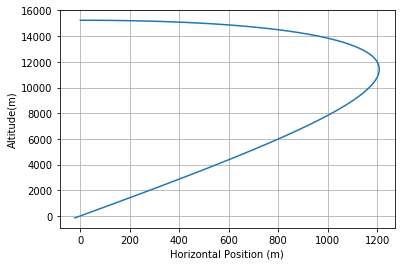

In [58]:
figure(3)
xlabel("Horizontal Position (m)")
ylabel("Altitude(m)")
plot(sol[0:k,0],sol[0:k,2])
grid()

The Trailing end of the trajectory is linear beacuase the bomb reachs
terminal velocity, both horizontally and vertically

Part c)

In [59]:
h = sol[0,2]
k = 0
increment = 1

vp_list = []
x_list = []

#This loop finds the values of x associated with a specific vp at y = 0
#thens ands the to vp_list and x_list respectively so they can be
#interpolated
vp = 50
while vp < 100:
    
    y = [x0, vp, y0, 0.0]
    sol = odeint(dy_dt,y,t, args = (a,b,vw))
    
    k = 0
    h = sol[0,2]

    while h > 0.0:
        k += 1
        h = sol[k,2]
    k += 2
    
    pos_y = interp1d(sol[0:k,2],t[0:k])
    pos_x = interp1d(t[0:k],sol[0:k,0])
    
    x = pos_x(pos_y(0))
    
    #print("vp",vp)      
    
    vp_list.append(vp)
    x_list.append(x)
    vp += 0.1

In [60]:
fvp = interp1d(x_list,vp_list)

In [61]:
#test
fvp(0)

array(80.0033386)

In [62]:
fvp(100)

array(85.30066258)

In [63]:
fvp(-100)

array(74.82503864)

In [64]:
#precision will be difference between the two values divided by 2
pre = abs(fvp(100)-fvp(-100))/2

In [65]:
print(pre)

5.2378119710517055


Thus, the pilot must keep their speed within 5.24 m/s of 80.30 m/s for 
the bomb to land within 100m of the target